In [ ]:
# imports for Q1
from google.colab import files
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
# additional imports for Q2
from scipy.linalg import svd
from sklearn.decomposition import PCA
# additional imports for Q3
import math
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import PIL
import torch
from torch.utils.data import Dataset, DataLoader, random_split, sampler
from google.colab import drive
from torchvision.datasets import ImageFolder
from torch import nn, optim, cuda
import torch.nn.functional as F
# additional imports for Q4
%matplotlib inline
import matplotlib.pyplot as plt

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec 31 18:05:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Data loading for Q1 and Q2
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

Saving data.csv to data.csv


In [ ]:
# Q1_1
"""
Question: Train and evaluate a least squares linear regression model predicting the value of variable D from variables A, B and C.

Regression should always be evaluated in terms of the R2 value on out-of-sample data.
Classification should be evaluated in terms of out-of-sample accuracy.
"""

# A, B, and C are the predictors for D
X = data.drop('D', axis=1)
y = data['D']

# 70% of data will be training data, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
q1_1_r = model.score(X_test, y_test)
print('r squared value : ', q1_1_r)

r squared value :  0.8277548061825256


In [ ]:
# Q1_2
"""
Question: Repeat the above task after carrying out in turn data normalisation, data scaling and
          their combination, and evaluate the benefits of each of these 3 types of data preprocessing.
"""

# Data normalisation
X_normalised = preprocessing.Normalizer().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
q1_2_normalising = model.score(X_test, y_test)

# Data scaling
X_scaled = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
q1_2_scaling = model.score(X_test, y_test)

# Their combination
X_normalised_then_scaled = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(preprocessing.Normalizer().fit(X).transform(X))
X_train, X_test, y_train, y_test = train_test_split(X_normalised_then_scaled, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
q1_2_norm_scal = model.score(X_test, y_test)

# Evaluation
print('r squared value : ', q1_1_r, ' (benchmark from Q1_1)')
print('r squared value scaled : ', q1_2_scaling)
print('r squared value normalised : ', q1_2_normalising)
print('r squared value normalised then scaled : ', q1_2_norm_scal)

print("\nWe see that when either normalising or scaling the data we sometimes achieve a slight improvement in fit.\nHowever, normalising and then scaling the data seems to consistently result in the best fit.")

r squared value :  0.8277548061825256  (benchmark from Q1_1)
r squared value scaled :  0.8141158727362552
r squared value normalised :  0.9173530396823083
r squared value normalised then scaled :  0.9193615660169236

We see that when either normalising or scaling the data we sometimes achieve a slight improvement in fit.
However, normalising and then scaling the data seems to consistently result in the best fit.


In [ ]:
# Q1_3
"""
Question: Try to outperform the best result of the previous step by using regularisation (e.g. L1, L2 or Elastic Net).
          Show how any parameter values are tuned and evaluate the benefits of regularisation.
"""

print("In cases where only a small number of predictor variables are significant,"
  + "\nlasso regression tends to perform better because it is able to shrink insignificant variables completely to zero and remove them from the model."
  + "\nHowever, when many predictor variables are significant in the model and their coefficients are roughly equal"
  + "\nthen ridge regression tends to perform better because it keeps all of the predictors in the model."
  + "\nElastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.\n")

print("\nTo determine which model is best at making predictions, we will perform k-fold cross-validation.")
kf = KFold(n_splits=5, shuffle=True)

# Lasso Regression (L1)
lasso = Lasso(alpha = 0.0025)
lasso.fit(X_train, y_train)
q1_3_lasso = lasso.score(X_test, y_test)
q1_3_cv_lasso = cross_val_score(Lasso(alpha = 0.0025), X_train, y_train, cv=kf).mean()

# Ridge Regression (L2)
ridge = Ridge(alpha = 0.0025)
ridge.fit(X_train, y_train)
q1_3_ridge = ridge.score(X_test, y_test)
q1_3_cv_ridge = cross_val_score(Ridge(alpha = 0.0025), X_train, y_train, cv=kf).mean()

# Elastic Net (L1 + L2)
elastic = ElasticNet(alpha = 0.0025)
elastic.fit(X_train, y_train)
q1_3_elastic = elastic.score(X_test, y_test)
q1_3_cv_elastic = cross_val_score(ElasticNet(alpha = 0.0025), X_train, y_train, cv=kf).mean()

# When you increase alpha you are pushing the regression to be more robust against overfitting, but might be getting larger training error.
print('cv_score_lasso : ', q1_3_cv_lasso)
print('cv_score_ridge : ', q1_3_cv_ridge)
print('cv_score_elasticNet : ', q1_3_cv_elastic)
print("\nThe mean cross validation scores of all 3 methods are relatively close, so we will rely on the r squared value as well to determine which is the best model.")
print("Furthermore, given the scores of Lasso and Ridge are quite similar, we can assume all the predictors are significant but their coefficients not roughly equal,\nhence Ridge does not consistently outperform Lasso (and vice versa).")

print('\nr squared value normalised then scaled : ', q1_2_norm_scal, ' (benchmark from Q1_2)')
print('r squared value lasso : ', q1_3_lasso)
print('r squared value ridge : ', q1_3_ridge)
print('r squared value elasticNet : ', q1_3_elastic)

print("\nRelying on the r squared value, of the 3 models we see Elastic Net,\nby combining the characteristics of both Lasso and Ridge, gives us the best fit most often.")
print("\nAn alpha of 0.0025 was opted for to limit the underfitting that regularisation inherently causes.\nFurthermore, when performing cross validation, we find an alpha of 0.0025 to provide reasonably high mean cv scores.\nDue to the small size of the dataset (which may cause overfitting), we see a significant improvement when using regularisation.")

In cases where only a small number of predictor variables are significant,
lasso regression tends to perform better because it is able to shrink insignificant variables completely to zero and remove them from the model.
However, when many predictor variables are significant in the model and their coefficients are roughly equal
then ridge regression tends to perform better because it keeps all of the predictors in the model.
Elastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.


To determine which model is best at making predictions, we will perform k-fold cross-validation.
cv_score_lasso :  0.8978652670515401
cv_score_ridge :  0.8914787947223013
cv_score_elasticNet :  0.9055954679607346

The mean cross validation scores of all 3 methods are relatively close, so we will rely on the r squared value as well to determine which is the best model.
Furthermore, given the scores of Lasso an

In [ ]:
# Q1_4
"""
Question: Add a complete set of second-order polynomial basis functions to the original data,
          and train a linear regression with an appropriate type of regularisation to find out whether the new basis functions bring any benefits.
          Explain briefly (in 1-2 sentences) your reasoning.
"""
"""
Polynomial feature expansion with higher degrees may lead to complex models that overfit, especially with smaller datasets.
Hence, polynomial feature expansion can be combined with regularisation to reduce overfitting.
"""
# Poly Linear Regression
model_linReg = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_linReg.fit(X_train, y_train)
q1_4_linReg = model_linReg.score(X_test, y_test)

# Poly Lasso Regression (L1)
model_lasso = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.0025))
model_lasso.fit(X_train, y_train)
q1_4_lasso = model_lasso.score(X_test, y_test)

# Poly Ridge Regression (L2)
model_ridge = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.0025))
model_ridge.fit(X_train, y_train)
q1_4_ridge = model_ridge.score(X_test, y_test)

# Poly Elastic Net (L1 + L2)
model_elastic = make_pipeline(PolynomialFeatures(2), ElasticNet(alpha=0.0025))
model_elastic.fit(X_train, y_train)
predictions = model_elastic.predict(X_test)
q1_4_elastic = model_elastic.score(X_test, y_test)


print('r squared value elasticNet : ', q1_3_elastic, ' (benchmark from Q1_3)')
print('r squared value poly_linearRegression : ', q1_4_linReg)
print('r squared value poly_ridge : ', q1_4_ridge)
print('r squared value poly_lasso : ', q1_4_lasso)
print('r squared value poly_elasticNet : ', q1_4_elastic)


# Explain briefly (in 1-2 sentences) your reasoning.
print("\nSince the new features are combinations of the existing features, we have increased the number of significant predictors.")
print("As a result, Lasso regression (and in turn Elastic Net also) do not benefit greatly from the addition of the second-order polynomial basis functions\nas much as Ridge regression and regular Linear regression do.")
print("Observing the r squared values above, we see Ridge Regression usually tends to perform the best, and Linear regression without regularisation coming a close second.")

r squared value elasticNet :  0.92075507138025  (benchmark from Q1_3)
r squared value poly_linearRegression :  0.923565351601481
r squared value poly_ridge :  0.9363504294792717
r squared value poly_lasso :  0.9203874936452507
r squared value poly_elasticNet :  0.9194663266042195

Since the new features are combinations of the existing features, we have increased the number of significant predictors.
As a result, Lasso regression (and in turn Elastic Net also) do not benefit greatly from the addition of the second-order polynomial basis functions
as much as Ridge regression and regular Linear regression do.
Observing the r squared values above, we see Ridge Regression usually tends to perform the best, and Linear regression without regularisation coming a close second.


In [ ]:
# Q1_5
"""
Question: Implement an appropriate automated procedure that will train all of the above models
          and select the model expected to perform best on unseen data with the same distribution as your
          training data. You need to include a code tile at the end of this section of your Jupyter notebook
          that attempts to test your final choice of model on a data set stored in a file unseendata.csv
          and compute R squared for it. The file will have exactly the same format as file data.csv, 
          including the header, but possibly a different overall number of rows. This means you can use a renamed
          copy of data.csv to debug that part of your code, and to produce the corresponding content
          for your PDF file (in order to demonstrate that this part of the code is in working order).
"""
def q1_5(training_data, a=0.0025):
  # highest r squared value, and model[idx]
  r = 0
  idx = 0
  # Data Normalisation and Scaling
  X = training_data.drop('D', axis=1)
  X = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(preprocessing.Normalizer().fit(X).transform(X))
  y = training_data['D']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  # The models: Linear, Lasso, Ridge, and Elastic-Net, with and without polynomial features (8 models in total)
  model = [[LinearRegression(), "Linear"], [Lasso(alpha=a), "Lasso"], [Ridge(alpha=a), "Ridge"], [ElasticNet(alpha=a),"Elastic-Net"],
           [make_pipeline(PolynomialFeatures(2), LinearRegression()), "Linear"], [make_pipeline(PolynomialFeatures(2), Lasso(alpha=a)), "Lasso"],
           [make_pipeline(PolynomialFeatures(2), Ridge(alpha=a)), "Ridge"], [make_pipeline(PolynomialFeatures(2), ElasticNet(alpha=a)), "Elastic-Net"]]
  # Training and testing of models, recording the lowest r squared value and the index of corresponding model
  for i in range(len(model)):
    model[i][0].fit(X_train, y_train)
    r_temp = model[i][0].score(X_test, y_test)
    if r_temp > r:
      r = r_temp
      idx = i
  if idx > 4:
    print(model[idx][1] + " Regression with second-order polynomial basis functions has been selected as the most suitable model,\nwith an r squared value of ", r)
  else:
    print(model[idx][1] + " Regression without second-order polynomial basis functions has been selected as the most suitable model,\nwith an r squared value of ", r)
  return model[idx][0]
  

In [ ]:
# Q1_5
# Procedure Usage: Run code tile, select the desired .csv file for testing
uploaded = files.upload()
unseen_data = pd.read_csv(io.BytesIO(uploaded['data.csv'])) # REPLACE WITH 'unseendata.csv'
training_data = data

model = q1_5(training_data)

X = unseen_data.drop('D', axis=1)
X = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(preprocessing.Normalizer().fit(X).transform(X))
y = unseen_data['D']

print("\nr squared value on unseen_data : ", model.score(X, y))

Saving data.csv to data (2).csv
Ridge Regression with second-order polynomial basis functions has been selected as the most suitable model,
with an r squared value of  0.9638372899490075

r squared value on unseen_data :  0.9277238247550443


In [ ]:
# Q1_6
"""
Question: Starting with the data in data.csv, find the median value of variable D. Replace all
          values up to and including the median value with 0, and all values greater than that with 1. Treat
          the resulting values of D as class labels to train and evaluate a classifier based on logistic
          regression that takes variables A, B and C as input.
Classification should be evaluated in terms of out-of-sample accuracy
"""
# Data loading
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
X = data.drop('D', axis=1)
X = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(preprocessing.Normalizer().fit(X).transform(X))
y = data['D']
y_labels = []
# Replacing y[i] <= median with 0, and y[i] > median with 1
median = y.median()
print('Median value of variable D : ', median, '\n')
for i in range(len(y)):
  if y[i] <= median:
    y_labels.append(0)
  else:
    y_labels.append(1)
# Training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
q1_6_classifier = classifier.score(X_test, y_test)

print('r squared value of classifier (mean accuracy on test data) : ', q1_6_classifier)

Median value of variable D :  4.463 

r squared value of classifier (mean accuracy on test data) :  0.9655172413793104


In [ ]:
# Q2 (part 1 of 3)
"""
Question: Starting with the same data.csv file from Q1, extend the table with 6 additional columns
          consisting of the product of each pair of the original 4 variables A, B, C and D. (AB, AC, AD, BC, BD, CD)
"""
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

# Permutations of multiplication
perms = [['A','B'], ['A','C'], ['A','D'], ['B','C'], ['B','D'], ['C','D']]

# Multiplication of the permutations and adding to table
for i in perms:
  lst = []
  for j in range(min(len(data[i[0]]), len(data[i[1]]))):
    lst.append(data[i[0]][j] * data[i[1]][j])
  data[i[0]+i[1]] = lst

print(data)
print("\n As shown above, the 6 columns have been added to the data, titled according to their contributing variables.")

         A       B       C      D          AB          AC         AD  \
0    0.012  10.073   0.064  0.536    0.120876    0.000768   0.006432   
1    0.279  10.496   0.367  0.696    2.928384    0.102393   0.194184   
2    0.101  10.214   0.165  0.744    1.031614    0.016665   0.075144   
3    0.546  10.919   0.670  0.857    5.961774    0.365820   0.467922   
4    0.457  10.778   0.569  0.876    4.925546    0.260033   0.400332   
..     ...     ...     ...    ...         ...         ...        ...   
90  10.069  26.006  11.477  6.259  261.854414  115.561913  63.021871   
91  10.158  26.147  11.578  6.264  265.601226  117.609324  63.629712   
92   8.200  23.045   9.356  6.306  188.969000   76.719200  51.709200   
93  10.336  26.429  11.780  6.467  273.170144  121.758080  66.842912   
94  10.603  26.852  12.083  6.585  284.711756  128.116049  69.820755   

            BC          BD         CD  
0     0.644672    5.399128   0.034304  
1     3.852032    7.305216   0.255432  
2     1.685310 

In [ ]:
# Q2 (part 2 of 3)
"""
Question: Apply principal component analysis (PCA) with a number of principal components (PCs) equal to
          the number of original variables, i.e. p = 4. Label the resulting principal components in
          decreasing order of variance as PC1. . .PC4 and list the linear equations showing how each of
          them is calculated from the 10 input variables. Describe which variables affect most strongly
          each of the 4 principal components, highlighting any notable findings and providing plausible
          explanations for them.
"""

# Checking the variance of the variables
print("We will start by examining the variance of each of the variables, including the 6 newly added ones.\n")
for i, variable in enumerate(data.columns):
    print('Sample variance of the data for variable {0} : {1}'.format(variable, np.var(data[variable])))
    if i == 3:
      print('\n')
print("\nAs expected, the product variables have the highest variances, since they are multiples of 2 other variables. Hence, they have the highest ranges and variances.")

print("\nSince PCA is affected by the units of features, we must standardise the features first. This prevents variables with larger ranges from dominating over those with smaller ranges.")
standardised_data = preprocessing.StandardScaler().fit_transform(data)
standardised_data = pd.DataFrame(standardised_data, columns = data.columns)
print("We do this by subtracting the mean and dividing by the standard deviation for each value of each variable i.e.,\nstandardised_val = (val - mean) / std")

print("\nNext, we look at the covariance of the variables.")
# Computing pairwise covariance of columns
print(standardised_data.cov())
print("Looking at the table above, we see that all 10 variables are positively correlated.\nHence, we can safely assume that the first principal component will account for majority of the variance.")


print("\nUsing Singular Value Decomposition (SVD) to get the first 4 principal components.\nscipy.linalg.svd by default uses the divide-and-conquer approach.")
print("The matrix standardised_data = U x D x V_transposed")
U, d, V = svd(standardised_data,full_matrices=False)
D = np.diag(d)
print("\nThe matrix U (left singular vectors as columns), multiplied by the matrix D (a matrix with the singular values on the diagonal),\nGives us the principal components.\n\nThe multiplication is as follows:")
print("PrincipalComponents[0][0]  = (U[0][0]*D[0][0])+...+(U[0][9]*D[9][0])")
print("PrincipalComponents[1][0]  = (U[1][0]*D[0][0])+...+(U[1][9]*D[9][0])\n                             ...")
print("PrincipalComponents[94][0] = (U[94][0]*D[0][0])+...+(U[94][9]*D[9][0])")
print("Hence, the first column of PrincipalComponents is the first principal component PC1, where PC1 = PrincipalComponents[:][:1]\n")
print("PrincipalComponents[0][1]  = (U[0][0]*D[0][1])+...+(U[0][9]*D[9][1])")
print("PrincipalComponents[1][1]  = (U[1][0]*D[0][1])+...+(U[1][9]*D[9][1])\n                             ...")
print("PrincipalComponents[94][1] = (U[94][0]*D[0][1])+...+(U[94][9]*D[9][1])")
print("Similarly, the second column of PrincipalComponents is the second principal component PC2, where PC2 = PrincipalComponents[:][1:2],\nPC3 = PrincipalComponents[:][2:3],\nand PC4 = PrincipalComponents[:][2:3]")
principal_components_10 = np.matmul(U, D)
principal_components_4 = []
for i in range(4):
  if i != 0:
    principal_components_4.append(principal_components_10[:,i:i+1])
  else:
    principal_components_4.append(principal_components_10[:,:1])
  # Uncomment the line below to print the principal components
  #print('PC{0}\n{1}'.format(i+1, principal_components_4[i]))

# For better understanding, a function that manually calculates and verifies the principal components has been attached below.
def testPCA(PC=1):
  lst = []
  for i in U:
    s = 0
    for j in range(10):
      s += i[j]*D[j][PC]
    lst.append([s])
  if PC == 1:
    return lst == principal_components_10[:,:1]
  else:
    return lst == principal_components_10[:,PC:PC+1]

# For simplicity, hereafter we will use sklearn.decomposition.PCA, as it is more optimised than manual calculation.
"""
# Output difference to sklearn.decomposition.PCA is negligible.
for i in range(4):
    print('Amount of variance explained by PC{0} : {1}'.format(i+1, np.var([item for sublist in principal_components_4[i] for item in sublist])))
"""
print("\n\n")
pca = PCA(n_components=4, svd_solver='full')
pca.fit(standardised_data)
for i in range(4):
    print('Amount of variance explained by PC{0} (ratio={1}) : {2}'.format(i+1, pca.explained_variance_ratio_[i], pca.explained_variance_[i]))

print("\nAs hypothesised previously, PC1 has a significantly larger variance, even when compared to the other principal components combined.\nThe ratio of explained variance of PC1 to the other principal components tells us that PC1 alone can retain ~98% of the information.")
print("Along with PC2, that ratio goes up to {0}, allowing us to safely discard the other components without losing too much information.".format(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))


We will start by examining the variance of each of the variables, including the 6 newly added ones.

Sample variance of the data for variable A : 9.415461433130194
Sample variance of the data for variable B : 23.631964240886425
Sample variance of the data for variable C : 12.125630864709144
Sample variance of the data for variable D : 2.3625070453185595


Sample variance of the data for variable AB : 7108.724585338601
Sample variance of the data for variable AC : 1512.6248785702696
Sample variance of the data for variable AD : 408.39471622118214
Sample variance of the data for variable BC : 9201.2418122001
Sample variance of the data for variable BD : 2176.784094968122
Sample variance of the data for variable CD : 529.2310910581956

As expected, the product variables have the highest variances, since they are multiples of 2 other variables. Hence, they have the highest ranges and variances.

Since PCA is affected by the units of features, we must standardise the features first. This pr

In [ ]:
# Q2 (part 3 of 3)
"""
Describe which variables affect most strongly each of the 4 principal components,
highlighting any notable findings and providing plausible explanations for them.
"""
print("Next, we will look at the variables that affect most strongly each of the 4 principal components.")
print("The important features are the ones that influence the components the most and thus, have a large absolute value on the component.")
def create_importance_dataframe(pca, original_num_df):
    # Changing principal components to a dataframe and assigning columns
    importance_df = pd.DataFrame(pca.components_)
    importance_df.columns = original_num_df.columns
    # Changing to absolute values, since we need to find the variables that affect each PC most strongly, regardless of direction
    importance_df = importance_df.apply(np.abs)
    importance_df = importance_df.transpose()
    num_pcs = importance_df.shape[1]
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]
    importance_df.columns = new_columns
    return importance_df

# Creation of importance df
importance_df = create_importance_dataframe(pca, standardised_data)
for i in range(4):
  pc = 'PC' + str(i+1)
  print('\nTop 3 of {0}:'.format(pc))
  display(importance_df[pc].sort_values(ascending = False)[:3])

print("\nLooking at the tables above, we see that\nPC1 is most strongly affected by CD,\nPC2 is most strongly affected by D,\nPC3 is most strongly affected by B,\nand PC4 is most strongly affected by AC.")
print("\nMathematically speaking, PC1 is the line that maximizes the variance (the average of the squared distances from the projected points to the origin)")
print("As we have seen, variables B and C have the highest variance in the raw dataset.\nHowever, performing PCA shows us that the combination of C and D (CD) contributes the most to PC1.")
print("\nAnother interesting observation is that the top 3 most important variables for PC1 are all combinations with the variable D.\nWe also see that the top variable for PC2 is also D.")
#new_data = pca.fit_transform(data)
#transformed_data = pca.fit_transform(standardised_data)

Next, we will look at the variables that affect most strongly each of the 4 principal components.
The important features are the ones that influence the components the most and thus, have a large absolute value on the component.

Top 3 of PC1:


CD    0.318491
AD    0.318467
BD    0.318274
Name: PC1, dtype: float64


Top 3 of PC2:


D     0.795335
AC    0.415187
AB    0.240584
Name: PC2, dtype: float64


Top 3 of PC3:


B    0.44348
A    0.44348
C    0.44348
Name: PC3, dtype: float64


Top 3 of PC4:


AC    0.505695
AD    0.435343
CD    0.432759
Name: PC4, dtype: float64


Looking at the tables above, we see that
PC1 is most strongly affected by CD,
PC2 is most strongly affected by D,
PC3 is most strongly affected by B,
and PC4 is most strongly affected by AC.

Mathematically speaking, PC1 is the line that maximizes the variance (the average of the squared distances from the projected points to the origin)
As we have seen, variables B and C have the highest variance in the raw dataset.
However, performing PCA shows us that the combination of C and D (CD) contributes the most to PC1.

Another interesting observation is that the top 3 most important variables for PC1 are all combinations with the variable D.
We also see that the top variable for PC2 is also D.


In [ ]:
# Q3 (part 1 of 5)
""" Question
The task in this part of the assessment is to train an image classification network to assign one of the five classes to a given input image.

You are free to preprocess or augment the input images however you like. 
You need to decide on an appropriate architecture for the network, choose an appropriate loss function, divide the dataset into training and validation sets,
train it on the training set and use the validation set to evaluate performance so that you can improve your design or tune hyperparameters.
Your network will be evaluated on an unseen test set by computing the classification rate, i.e. the proportion of images that are assigned the correct class.

You need to include a python script classify_symbols.py that I can import which contains a function classify(images) as covered in practicals.
This function should load your pretrained network from the weights you supply, pass the input images through the network and return classes.
The input images is a B × 1 × 48 × 48 PyTorch tensor containing a batch of B images, each with one grayscale channel and of size 48 × 48 -
i.e. the same format as the training data. Intensity values will be in the range (0, 1).
Any preprocessing or normalisation that you need to apply to the images must be inside the classify function.
The output classes is a B × 1 tensor containing integers between 0 and 4 indicating the estimated class for each input image.

Your notebook must include your training and validation code along with discussion and justification for all design decisions.
You are not allowed to use transfer learning on a pretrained network and your saved network weights must not exceed 20MiB.
"""

print("First, we will begin by loading the data and converting the images into tensors of floats.")
transform = transforms.Compose([transforms.Grayscale(), transforms.PILToTensor(), transforms.ConvertImageDtype(torch.float)])
drive.mount('/content/drive/', force_remount=False)
dataset = ImageFolder(root="/content/drive/MyDrive/symbols_dataset", transform=transform)
#dataset = ImageFolder(root="/content/symbols_dataset", transform=transform)

First, we will begin by loading the data and converting the images into tensors of floats.
Mounted at /content/drive/


In [ ]:
# Q3 (part 2 of 5)
class D(Dataset):
  def __init__(self, dataset, batch_sz=10, train_size=0.8):

    self.train_size = int(train_size * len(dataset))
    self.test_size = len(dataset) - self.train_size
    self.batch = batch_sz

    # Handling the lack of balance
    #weights = list(1.0 / np.array([6000, 182, 606, 3685, 6356]))
    weights = self.weights(dataset.imgs, len(dataset.classes))
    weights = torch.DoubleTensor(weights)                                       
    weighted_sampler = sampler.WeightedRandomSampler(weights, len(weights), replacement=True)
    
    # Creating the dataloaders
    training_data, testing_data = torch.utils.data.random_split(dataset, [self.train_size, self.test_size])
    self.training_dataset = DataLoader(training_data, batch_size=batch_sz)#, sampler=weighted_sampler)
    self.testing_dataset = DataLoader(testing_data, batch_size=batch_sz)#, sampler=weighted_sampler)
    self.train_size = len(self.training_dataset)
    self.test_size = len(self.testing_dataset)
    
  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    """
    image = (self.data[idx,:,:].float()/255).unsqueeze(0)
    label = self.labels[idx]
    return image, label
    """
    return None

  def weights(self, images, nclasses):
    n_images = len(images)
    count_per_class = [0] * nclasses
    for _, image_class in images:
        count_per_class[image_class] += 1
    weight_per_class = [0.] * nclasses
    for i in range(nclasses):
        weight_per_class[i] = float(n_images) / float(count_per_class[i])
    weights = [0] * n_images
    for idx, (image, image_class) in enumerate(images):
        weights[idx] = weight_per_class[image_class]
    return weights
  

print("Next, we define the dataset class, which will hold the dataloaders.\nIn order to improve the balance of the data, a method weights(images, nclasses) has also been defined.")
print("This method adds a weighting for each of the 5 classes, in proportion to the number of datapoints in each class.\nWe then use these weights for a weighted random sampler, such that the classes with fewer datapoints occur more often.")
print("Given that is a form of undersampling, naturally the main drawback of this technique is the reduction in size of the training and testing set,\nwhich may lead to overfitting. This overfitting is handled in the design of the network itself.")

Next, we define the dataset class, which will hold the dataloaders.
In order to improve the balance of the data, a method weights(images, nclasses) has also been defined.
This method adds a weighting for each of the 5 classes, in proportion to the number of datapoints in each class.
We then use these weights for a weighted random sampler, such that the classes with fewer datapoints occur more often.
Given that is a form of undersampling, naturally the main drawback of this technique is the reduction in size of the training and testing set,
which may lead to overfitting. This overfitting is handled in the design of the network itself.


In [ ]:
# Q3 (part 3 of 5)
# The Convolutional Neural Network
""" V1 [UNBALANCED]
Train accuracy over epoch 1: 0.9498
Test accuracy at epoch 1: 0.9489
Size: 32.1MiB
"""
""" V2 [WEIGHTED RANDOM SAMPLING / UNDERSAMPLING]
Train accuracy over epoch 20: 0.9878
Test accuracy at epoch 20: 0.9896
"""

class Q3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=2592, out_features=128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 5)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        # Input x has dimensions B x 1 x 48 x 48, B is batch size
        batchsz = x.size(0)
        x = self.conv1(x)
        # B x 16 x 44 x 44
        x = F.relu(x)
        x = F.avg_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = self.dropout(x)
        x = self.conv2(x)
        # B x 32 x 18 x 18
        x = F.relu(x)
        x = F.avg_pool2d(x, kernel_size=2, stride=2, padding=0)
        x = x.view(batchsz, -1)
        x = self.dropout(x)
        # Flattened to B x 2592
        x = self.fc1(x)
        # B x 128
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        # B x 64
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        # B x 5
        x = F.relu(x)
        # output B x 5
        return x

# Loading the model and dataset
model = Q3()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
d = D(dataset, batch_sz=100)
# Setting the loss and optimiser functions
criterion = nn.CrossEntropyLoss()
optimiseur = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("Given the dataset has shrunk considerably after the weighted random sampling, the design follows the basic LeNet style of design,\nwith 2 convolutional layers followed by 3 fully connected layers,\nwith pooling after each of the convolutional layers.")
print("\nThe design however, differs in 2 key areas:\nReLU activation is used instead of sigmoid, for ease of computation.\nA dropout is also introduced after each layer to reduce the aforementioned overfitting.\n")
print("\nFor the optimiser, testing was done with both Stochastic Gradient Descent and ADAM. Ultimately, SGD was chosen for its ability to generalise.\n(Nitish Shirish Keskar and Richard Socher. Improving generalization performance by switching from adam to SGD. CoRR, abs/1712.07628, 2017)")
print("\nAs for the criterion (loss function), Categorical Cross Entropy Loss was opted for its speed\nand overall accuracy of the network with it during testing.")
print("\nNormalisation was considered by ultimately not implemented as the training and testing accuracies were already >98%.")
print("We also observe below that the chosen hyperparameters were effective, given the speed of convergence.")

Given the dataset has shrunk considerably after the weighted random sampling, the design follows the basic LeNet style of design,
with 2 convolutional layers followed by 3 fully connected layers,
with pooling after each of the convolutional layers.

The design however, differs in 2 key areas:
ReLU activation is used instead of sigmoid, for ease of computation.
A dropout is also introduced after each layer to reduce the aforementioned overfitting.


For the optimiser, testing was done with both Stochastic Gradient Descent and ADAM. Ultimately, SGD was chosen for its ability to generalise.
(Nitish Shirish Keskar and Richard Socher. Improving generalization performance by switching from adam to SGD. CoRR, abs/1712.07628, 2017)

As for the criterion (loss function), Categorical Cross Entropy Loss was opted for its speed
and overall accuracy of the network with it during testing.

Normalisation was considered by ultimately not implemented as the training and testing accuracies were already 

In [ ]:
# Q3 (part 4 of 5)
num_epochs = 20

# Initialise some variables for computing and tracking stats
iterations_per_epoch = math.ceil(d.train_size/d.batch)
training_losses = []
training_accuracies = []
testing_losses = []
testing_accuracies = []
best = 0
print(d.train_size)
print(d.test_size)
images, labels = next(iter(d.training_dataset))

for epoch in range(num_epochs):

  # One epoch on the training set
  total_loss = 0
  correct = 0
  total = 0
  total_loss = 0
  for i, (inputs, labels) in enumerate(d.training_dataset):
    inputs, labels = inputs.to(device), labels.to(device)
    output = model(inputs)
    loss = criterion(output,labels)
    optimiseur.zero_grad()
    loss.backward()
    optimiseur.step()
    pred_y = torch.argmax(output, 1)
    correct += (pred_y == labels).sum()
    total += float(labels.size(0))
    total_loss += loss*images.shape[0]
    if (i+1) % 100 == 0:
       print('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, iterations_per_epoch, loss.item()))
  total_loss /= d.train_size
  training_losses.append(total_loss.item())
  training_accuracies.append(correct/total)
  print('Train accuracy over epoch {}: {:.4f}'.format(epoch+1,training_accuracies[-1]))

  # One epoch on the test set
  correct = 0
  total = 0
  # Switch to evaluation mode
  model.eval()
  with torch.no_grad():
    c = 0
    for inputs, labels in d.testing_dataset:
      inputs, labels = inputs.to(device), labels.to(device)
      output = model(inputs)
      loss = criterion(output,labels)
      pred_y = torch.argmax(output, 1)
      correct += (pred_y == labels).sum()
      total += float(labels.size(0))
      total_loss += loss*images.shape[0]
      c += 1
    test_accuracy = correct/total
  total_loss /= d.test_size
  testing_losses.append(total_loss.item()) 
  # Switch back to training mode
  model.train()
  testing_accuracies.append(test_accuracy)
  print('Test accuracy at epoch {}: {:.4f}'.format(epoch+1,test_accuracy))
  if test_accuracy > best:
    best = test_accuracy
    torch.save(model.state_dict(), "int3_q3_v2_"+str(epoch+1)+".pkl")

135
34
Epoch [1/20], Iteration [100/2], Loss: 0.1398
Train accuracy over epoch 1: 0.7139
Test accuracy at epoch 1: 0.9834
Epoch [2/20], Iteration [100/2], Loss: 0.0195
Train accuracy over epoch 2: 0.9812
Test accuracy at epoch 2: 0.9947
Epoch [3/20], Iteration [100/2], Loss: 0.0052
Train accuracy over epoch 3: 0.9909
Test accuracy at epoch 3: 0.9964
Epoch [4/20], Iteration [100/2], Loss: 0.0073
Train accuracy over epoch 4: 0.9955
Test accuracy at epoch 4: 0.9967
Epoch [5/20], Iteration [100/2], Loss: 0.0096
Train accuracy over epoch 5: 0.9955
Test accuracy at epoch 5: 0.9970
Epoch [6/20], Iteration [100/2], Loss: 0.0033
Train accuracy over epoch 6: 0.9967
Test accuracy at epoch 6: 0.9970
Epoch [7/20], Iteration [100/2], Loss: 0.0109
Train accuracy over epoch 7: 0.9968
Test accuracy at epoch 7: 0.9976
Epoch [8/20], Iteration [100/2], Loss: 0.0030
Train accuracy over epoch 8: 0.9968
Test accuracy at epoch 8: 0.9979
Epoch [9/20], Iteration [100/2], Loss: 0.0134
Train accuracy over epoch 9

In [ ]:
# Q3 (part 5 of 5)
# classify_symbols.py testing
import classify_symbols
d = D(dataset, batch_sz=10)
for input, label in d.testing_dataset:
  output = classify_symbols.classify(input)
  print(output)
  print(label)
  break

tensor([4, 0, 3, 4, 0, 0, 4, 4, 4, 0])
tensor([4, 0, 3, 4, 0, 0, 4, 4, 4, 0])


First we will reload the data as in Q3, and also resize to the images to 64x64.


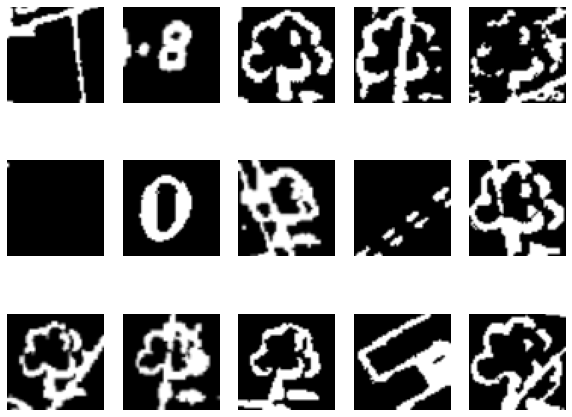

In [ ]:
# Q4
""" Question
Train a Generative Adversarial Network (GAN) to create tree symbol images. You must choose an appropriate
architecture for the generator and discriminator, decide on the dimensionality of the latent space
and train your GAN in order to learn a generator for tree symbol images. Again, you may
preprocess the images however you like and can augment to provide more images for training if you wish.

You should include a code tile that generates 8 random samples from your generative model.
i.e. randomly sample from your latent space 8 times, pass these through your generator network
and display the resulting images. Ensure that your PDF file contains these images.

You should also include a code tile that performs latent space interpolation between two samples.
Generate two random samples from the latent space as before, then linearly interpolate 5
intermediate latent vectors and display all 7 resulting images in order (i.e. the first randomly
sampled tree symbol, then the 5 interpolated samples, then finally the second randomly sampled
tree symbol). You would expect that the middle image looks something like an average between
the start and end images. Ensure that your PDF file contains these images and choose an
example where the two random samples are visually different so that the effect of the
interpolation is clear.
"""
print("First we will reload the data as in Q3, and also resize to the images to 64x64.")
transform = transforms.Compose([transforms.Grayscale(),transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float), transforms.Resize(64),
                                transforms.CenterCrop(64),transforms.Normalize(0.5,0.5)])
dataset = ImageFolder(root="/content/drive/MyDrive/symbols_dataset", transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True, num_workers=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

images, labels = next(iter(dataloader))

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 3
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(0.5-0.5*images[i,:].squeeze(), cmap="gray")
plt.show()

In [ ]:
batch_size = 100
nz = 100 # Size of z latent vector (i.e. size of generator input)
ngf = 32 # Size of feature maps in generator
ndf = 32 # Size of feature maps in discriminator
num_epochs = 150 # Number of training epochs
lr = 0.0002 # Learning rate for optimisers
beta1 = 0.5 # Beta1 hyperparam for Adam optimisers
nc = 1

print("The architecture for the GAN is the standard DCGAN architecture,\nwhere the Generator and Discriminator have 5 convolutional layers each, each of which is followed by some batch normalisation.")
print("A variety of hyper parameters were experimented with, but ultimately it was found that the standard parameters produced the best results.")

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

netG = Generator()
netG = netG.to(device)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

netD = Discriminator()
netD = netD.to(device)

The architecture for the GAN is the standard DCGAN architecture,
where the Generator and Discriminator have 5 convolutional layers each, each of which is followed by some batch normalisation.
A variety of hyper parameters were experimented with, but ultimately it was found that the standard parameters produced the best results.


In [ ]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Training Loop

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, (images,labels) in enumerate(dataloader):
        batch_size = len(images)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_images = images.to(device)
        label = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_images).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        z = torch.randn(batch_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(z)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch+1, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

torch.save(netG.state_dict(), "int3_q4_generator.pkl")
torch.save(netD.state_dict(), "int3_q4_discriminator.pkl")

Starting Training Loop...
[1/150][0/169]	Loss_D: 1.4528	Loss_G: 1.1983	D(x): 0.5449	D(G(z)): 0.5569 / 0.3098
[1/150][50/169]	Loss_D: 0.0239	Loss_G: 7.4237	D(x): 0.9921	D(G(z)): 0.0154 / 0.0006
[1/150][100/169]	Loss_D: 0.0111	Loss_G: 8.2055	D(x): 0.9934	D(G(z)): 0.0043 / 0.0003
[1/150][150/169]	Loss_D: 0.2103	Loss_G: 5.4852	D(x): 0.9265	D(G(z)): 0.0860 / 0.0054
[2/150][0/169]	Loss_D: 0.2100	Loss_G: 3.5467	D(x): 0.8944	D(G(z)): 0.0724 / 0.0348
[2/150][50/169]	Loss_D: 0.1262	Loss_G: 3.7394	D(x): 0.9203	D(G(z)): 0.0276 / 0.0303
[2/150][100/169]	Loss_D: 0.2856	Loss_G: 7.0470	D(x): 0.9772	D(G(z)): 0.2204 / 0.0012
[2/150][150/169]	Loss_D: 0.2327	Loss_G: 2.1177	D(x): 0.8569	D(G(z)): 0.0535 / 0.1530
[3/150][0/169]	Loss_D: 0.2391	Loss_G: 4.0789	D(x): 0.8275	D(G(z)): 0.0151 / 0.0302
[3/150][50/169]	Loss_D: 0.2630	Loss_G: 3.3016	D(x): 0.8892	D(G(z)): 0.1071 / 0.0636
[3/150][100/169]	Loss_D: 0.1446	Loss_G: 3.7532	D(x): 0.9725	D(G(z)): 0.1024 / 0.0369
[3/150][150/169]	Loss_D: 0.3592	Loss_G: 4.3375	D

After 150 epochs, we see the following images are able to be generated by NetG.


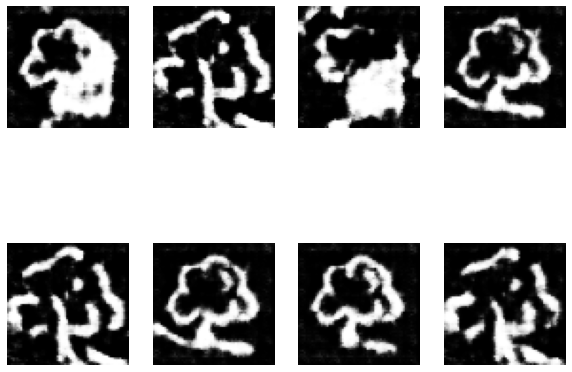

In [ ]:

print("After 150 epochs, we see the following images are able to be generated by NetG.")
z = torch.randn(8,nz,1,1,device=device)
images = netG(z)

figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 2
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(0.5-0.5*images[i,:].cpu().detach().squeeze(), cmap="gray")
plt.show()

Here, we see linear interpolation. Although the resolution is not clear, we can still make out a transition between the 1st and 7th image.


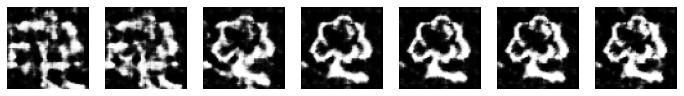

In [ ]:

print("Here, we see linear interpolation. Although the resolution is not clear, we can still make out a transition between the 1st and 7th image.")
nsamples = 7
z1 = torch.randn(1, nz, 1, 1, device=device)
z2 = torch.randn(1, nz, 1, 1, device=device)
z = torch.zeros(nsamples,nz,1,1,device=device)
for i in range(nsamples):
  w1 = i/(nsamples-1)
  w2 = 1-w1
  z[i,:,:,:] = w1*z1 + w2*z2
images = netG(z)

figure = plt.figure(figsize=(12, 4))
for i in range(nsamples):
    figure.add_subplot(1, nsamples, i+1)
    plt.axis("off")
    plt.imshow(0.5-0.5*images[i,:].squeeze().cpu().detach(), cmap="gray")
plt.show()

We observe that the GAN training does not converge, even after 100 epochs. However, the Generator in its current state is able to produce images that resemble the trees in the dataset to a relatively high degree.

In the latent space interpolation above, we see a transition from one drawing of a tree to another, with the image in the middle being an average of the 2.